In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("task2.txt", sep="\t", header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.155051,0.974187,0.074675,0.442146,0.369443,0.468138,0.578846,0.422744,0.931543,0.474148,15
1,0.968379,0.716820,0.678846,0.510049,0.545299,0.573692,0.817491,0.206636,0.880111,0.574187,17
2,0.468263,0.405603,0.320325,0.468084,0.100995,0.974407,0.300062,0.608356,0.050082,0.762011,12
3,0.776820,0.103740,0.373748,0.797782,0.906810,0.599069,0.626680,0.924705,0.632768,0.512663,16
4,0.407886,0.415357,0.101543,0.935160,0.444124,0.193607,0.656837,0.599929,0.868582,0.405406,20
...,...,...,...,...,...,...,...,...,...,...,...
995,0.162843,0.435990,0.149917,0.665505,0.914584,0.630336,0.384881,0.407224,0.328757,0.994527,16
996,0.907179,0.737143,0.830932,0.799533,0.214602,0.800022,0.504500,0.494688,0.462960,0.276626,20
997,0.505830,0.163747,0.146821,0.667286,0.573377,0.585563,0.934153,0.312294,0.854859,0.607592,15
998,0.296363,0.720200,0.434514,0.755218,0.613471,0.940339,0.329413,0.763345,0.018250,0.474626,17


### Проведем EDA

Проверим на пропуски

In [4]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

In [5]:
data.isna().sum().sum()

0

В силу того, что все типы данных численные и нет явных NaN, то можно сделать вывод, что пропусков нет.

Посмотрим на значения признаков

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.490491,0.499785,0.496466,0.503167,0.508902,0.513466,0.487111,0.498870,0.505611,0.499113,15.014000
std,0.293920,0.278833,0.298024,0.284102,0.283300,0.291059,0.288407,0.285954,0.283131,0.284073,4.771223
min,0.000188,0.000085,0.003110,0.001223,0.005314,0.000517,0.000493,0.000408,0.007883,0.000170,3.000000
25%,0.218825,0.262168,0.231492,0.268925,0.274572,0.255524,0.237778,0.256103,0.262332,0.249675,12.000000
50%,0.504439,0.500901,0.484347,0.503412,0.508629,0.527155,0.475274,0.501300,0.518847,0.509422,15.000000
75%,0.738004,0.734516,0.764729,0.747587,0.742461,0.766870,0.738885,0.736849,0.748473,0.741870,18.000000
max,0.999566,0.999959,0.998918,0.998785,0.998478,0.999059,0.999179,0.998646,0.998884,0.998819,29.000000


Заметим, что по статистикам из таблицы выше выводы о важности признаков нельзя сделать, потому что все принимают примерно одно и то же значение. Далее посмотрим на распределение целевой переменной 

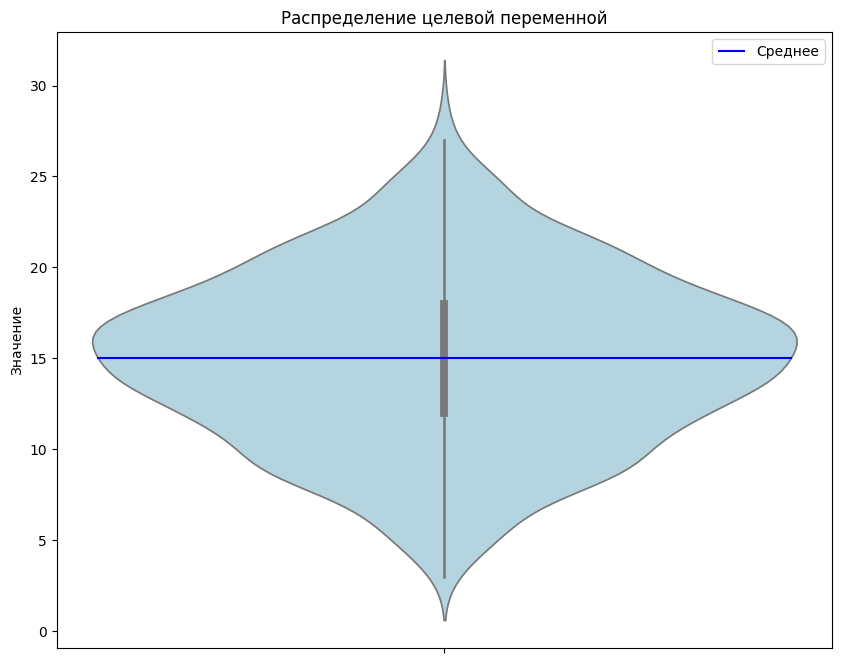

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Распределение целевой переменной")
plt.ylabel("Значение")
sns.violinplot(data[10], color="lightblue",)

ax.hlines(data[10].mean(), -0.395,  0.395, color="blue", label="Среднее")
plt.legend();


Целевая переменная симметрично распределена и почти не имеет выбросов. Посчитаем процент выбросов.

In [8]:
Q1 = data[10].quantile(0.25)
Q3 = data[10].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data[10] < Q1 - 1.5 * IQR ) | (data[10] > Q3 + 1.5 * IQR)][10]
print(f"Число выбросов: {outliers.shape[0] / data.shape[0] * 100} %")

Число выбросов: 0.2 %


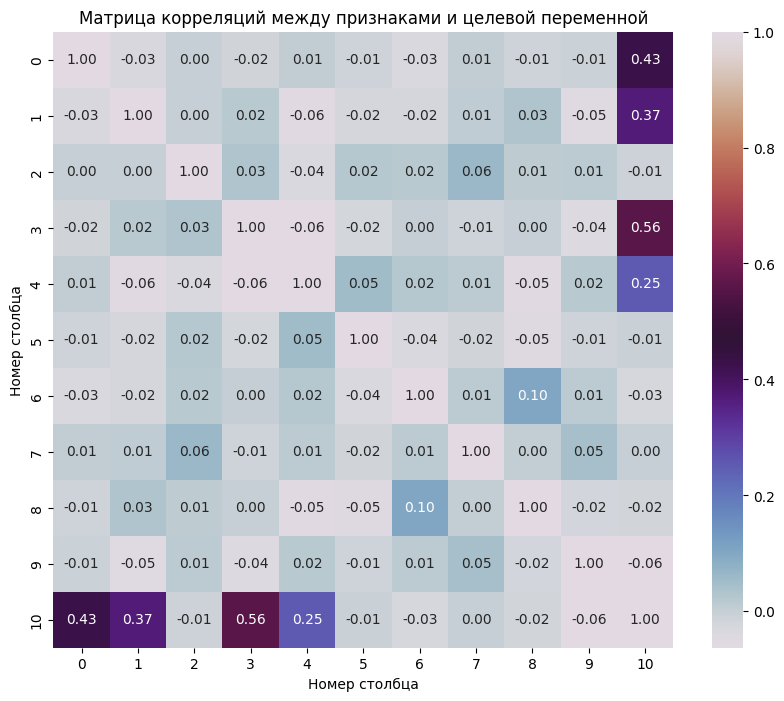

In [9]:
plt.subplots(figsize=(10,8))

sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="twilight")
plt.title("Матрица корреляций между признаками и целевой переменной")
plt.xlabel("Номер столбца")
plt.ylabel("Номер столбца");

Видно, что есть заметная корреляция между целевой переменной и 0, 1, 3, 4 признаками. Также можно заметить, что признаки между собой линейно независимы.

Возможно существует какая-либо нелинейная зависимость между признаками. Проверим это, используя `pairplot`

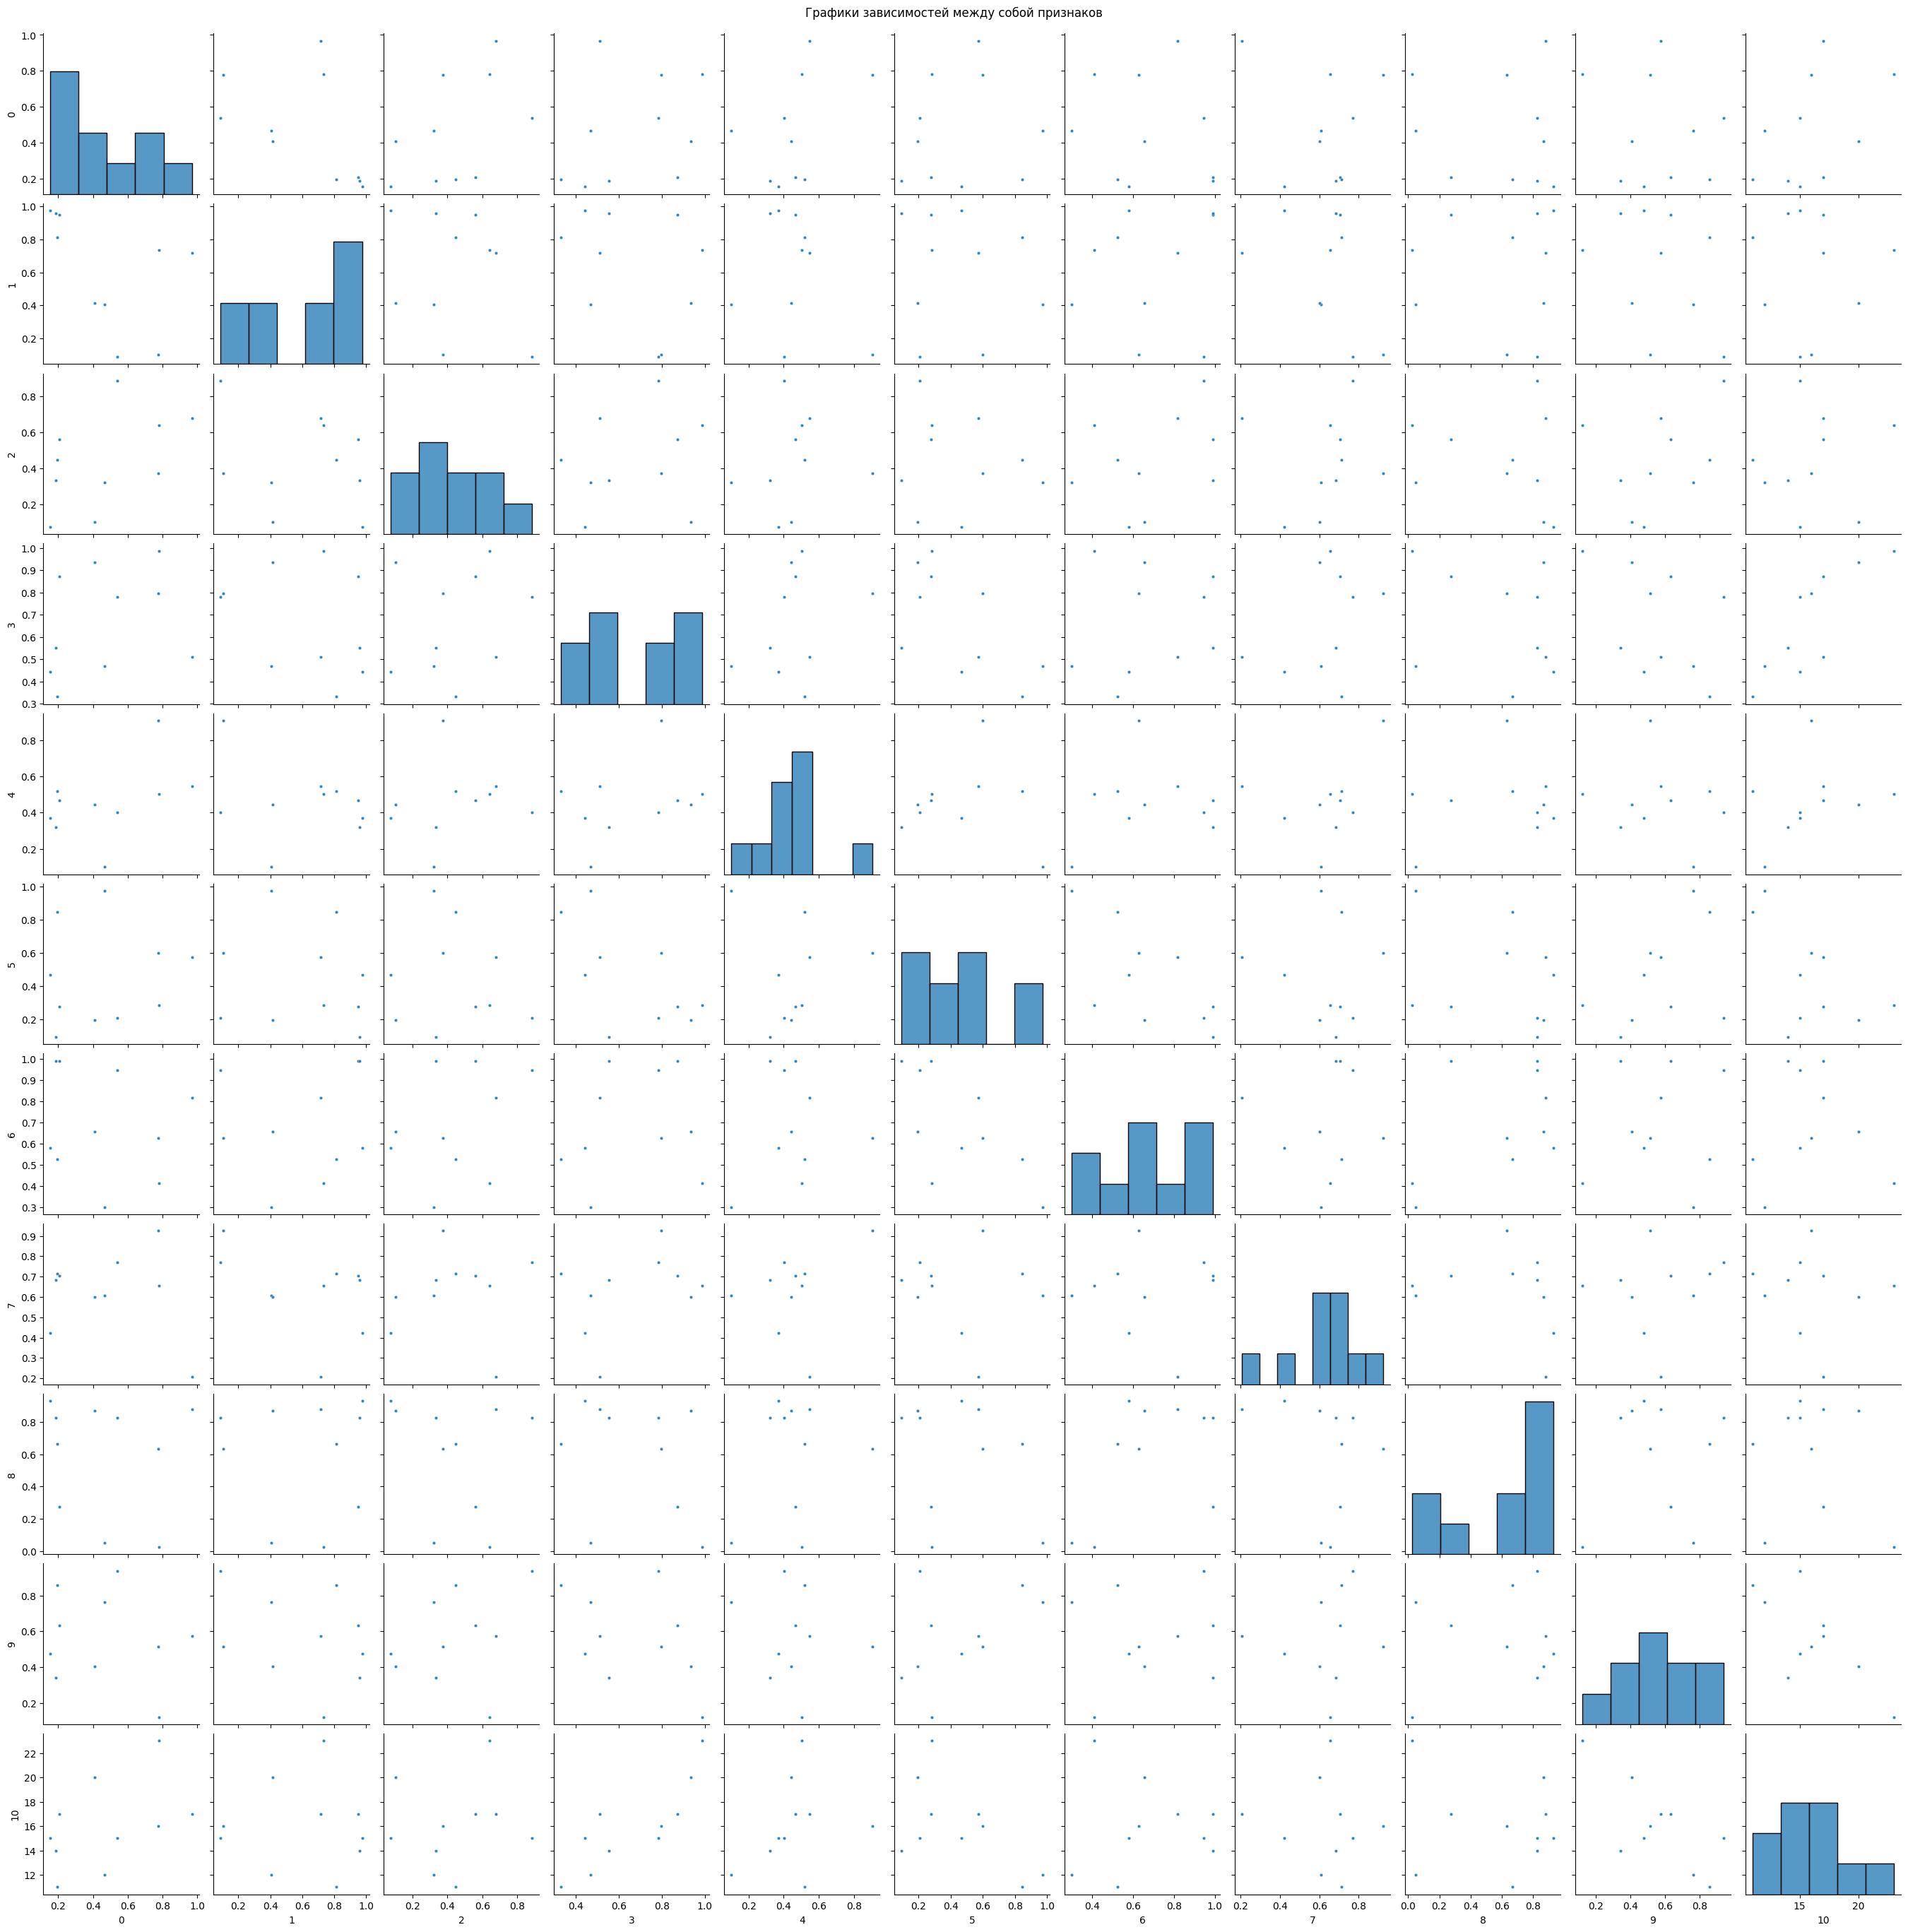

In [10]:
sns.pairplot(data[:10], plot_kws={'s': 10, 'alpha': 0.9})
plt.suptitle("Графики зависимостей между собой признаков", y=1)
plt.show()


Смотря на графики, можно заметить, что никакой нелинейной зависимости не наблюдается, данные либо слишком зашумлены, либо независимы. Гипотеза с сильным шумом не может быть верной в силу того, что каждый признак имеет 
$std \approx 0.3$.

## Построение моделей

Поставим задачу как задачу регрессии (можно еще поставить задачу классификации на 28 классов, небольшой анализ будет в конце ноутбука). 

В качестве метрики будем использовать $RMSE$.

При этом добавим в данные случайный признак (с тем же среднем и стандартным отклонением, что и у других признаков), чтобы относительно него измерять важность других признаков.

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data.loc[:,:9], data.loc[:,10], test_size=0.2, random_state=42)

In [12]:
X_train[11] = np.random.normal(0.29, 0.3, 800) # добавляем случайный признак

### Lasso

Для начала построим Lasso  для оценки важности признаков

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.linspace(1e-8, 5, 1000)
grid = GridSearchCV(Lasso(), {"alpha": alphas}, scoring="neg_root_mean_squared_error", cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-08, 5.00501499e-03, 1.00100200e-02, 1.50150250e-02,
       2.00200300e-02, 2.50250350e-02, 3.00300400e-02, 3.50350450e-02,
       4.00400500e-02, 4.50450550e-02, 5.00500599e-02, 5.50550649e-02,
       6.00600699e-02, 6.50650749e-02, 7.00700799e-02, 7.50750849e-02,
       8.00800899e-02, 8.50850949e-02, 9.00900999e-02, 9....
       4.88488489e+00, 4.88988989e+00, 4.89489490e+00, 4.89989990e+00,
       4.90490491e+00, 4.90990991e+00, 4.91491492e+00, 4.91991992e+00,
       4.92492493e+00, 4.92992993e+00, 4.93493494e+00, 4.93993994e+00,
       4.94494495e+00, 4.94994995e+00, 4.95495496e+00, 4.95995996e+00,
       4.96496497e+00, 4.96996997e+00, 4.97497498e+00, 4.97997998e+00,
       4.98498499e+00, 4.98998999e+00, 4.99499500e+00, 5.00000000e+00])},
             scoring='neg_root_mean_squared_error')

In [14]:
print("Лучший параметр:", grid.best_params_)
print("Лучший score",grid.best_score_)


Лучший параметр: {'alpha': 0.025025034974974977}
Лучший score -2.434005857847448


Получаем, что лучший $RMSE = 2.43$ для Lasso с $\alpha = 0.02$. Посмотрим на важность признаков

In [15]:
pd.DataFrame({"Признак": np.arange(0,11), "Модуль коэффициента": np.abs(grid.best_estimator_.coef_)}).set_index("Признак").sort_values(by="Модуль коэффициента",ascending=False)

,Модуль коэффициента
Признак,
3,9.172629
0,6.896357
1,6.320800
4,4.859055
9,0.148859
2,0.000000
5,0.000000
6,0.000000
7,0.000000


Получили, что наименее важные признаки: 2, 5, 6, 7, 8

**Гипотеза 1**: наименее важные признаки: 2, 5, 6, 7, 8

### Случайный лес

In [16]:
from sklearn.ensemble import RandomForestRegressor

params_RF = {"n_estimators": np.arange(250, 350, 10),
             "max_depth": np.arange(10, 20,2)}
grid_RF = GridSearchCV(RandomForestRegressor(), params_RF, scoring="neg_root_mean_squared_error", cv=5)
grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([10, 12, 14, 16, 18]),
                         'n_estimators': array([250, 260, 270, 280, 290, 300, 310, 320, 330, 340])},
             scoring='neg_root_mean_squared_error')

In [17]:
print("Лучшие  параметры:", grid_RF.best_params_)
print("Лучший score",grid_RF.best_score_)

Лучшие  параметры: {'max_depth': 18, 'n_estimators': 340}
Лучший score -1.878447659193166


Видим, что $RMSE$ упало. Посмотрим на feature importance

In [18]:
grid_RF.best_estimator_.feature_importances_

array([0.24684955, 0.21724287, 0.04599571, 0.34008628, 0.08590744,
       0.01025566, 0.01068701, 0.00949604, 0.00938074, 0.01085838,
       0.01324032])

In [26]:
pd.DataFrame({"Признак": np.arange(0,11), "Feature importance": grid_RF.best_estimator_.feature_importances_}).set_index("Признак").sort_values(by="Feature importance",ascending=False)

,Feature importance
Признак,
3,0.340086
0,0.246850
1,0.217243
4,0.085907
2,0.045996
10,0.013240
9,0.010858
6,0.010687
5,0.010256


Заметим, что хоть строго сказать, что какой-либо признак работает хуже случайного нельзя (потому что ни один признак не обладает feature importance меньшим, чем у 10 признака), но признаки 6, 9, 5, 8, 7 очень близки к нему

**Гипотеза 2**: 6, 9, 5, 8, 7 

Набор неважных признаков выявлен, теперь можно прийти к обоснованию с точки зрения точности модели.

## Обоснование неважных признаков с точки зрения точности модели

In [20]:
X_train.drop(11, axis=1, inplace=True) # удаляем случайный признак, чтобы не тратить на него время

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) # создаем валидационную выборку, чтобы измерить на ней качество

In [22]:
from sklearn.metrics import root_mean_squared_error as rmse 


# Найдем score на данных без удаления признаков
model = RandomForestRegressor(**grid_RF.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rf_rmse_all_selected = rmse(y_pred, y_val)

### Независимое удаление по одному признаку

Будем удалять признак по одному и смотреть на прирост точности

In [23]:
scores_independent_delete = {}

for feature in tqdm(X_train.columns):
    X_train_trunc = X_train.drop(feature, axis=1)
    X_val_trunc = X_val.drop(feature, axis=1)

    model = RandomForestRegressor(**grid_RF.best_params_)
    model.fit(X_train_trunc, y_train)
    y_pred = model.predict(X_val_trunc)
    current_rmse= rmse(y_pred, y_val)

    scores_independent_delete[feature] = current_rmse

100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


In [24]:
scores_independent_delete_df = pd.DataFrame.from_dict(scores_independent_delete, orient='index', columns=['RMSE'])
scores_independent_delete_df['Прирост точности'] = rf_rmse_all_selected - scores_independent_delete_df["RMSE"]
scores_independent_delete_df.sort_values(by="Прирост точности", ascending=False, inplace=True)

In [25]:
scores_independent_delete_df

,RMSE,Прирост точности
5,1.810729,0.044999
9,1.830333,0.025395
8,1.836649,0.019078
6,1.847722,0.008005
7,1.861395,-0.005667
2,2.101931,-0.246204
4,2.154035,-0.298307
1,2.758237,-0.902510
3,3.143137,-1.287410
0,3.221529,-1.365802


Согласно независимому удалению признаков наименее важные признаки: 6, 5, 9, 8. В гипотезе 2 эти признаки перечислены, в гипотезе 1 нет признака 9.

### Удаление признаков рекурсивно

In [27]:
from sklearn.feature_selection import RFE


scores_rec = {}
selected_features = set(X_train.columns)

for num_features_select in range(9, 0, -1):
    model = RandomForestRegressor(**grid_RF.best_params_) # создаем новую пустую модель
    extractor = RFE(model, n_features_to_select=num_features_select) # рекурсивно убираем наимеенее важные признаки, оставляя только num_features_select признаков
    extractor.fit(X_train, y_train)

    selected_now = set(X_train.columns[extractor.support_])
    removed = list(selected_features - selected_now)
    selected_features = selected_now

    y_pred = extractor.predict(X_val)

    scores_rec[10 - num_features_select] = [rmse(y_val, y_pred), removed[0]]


    print(f"Число признаков: {num_features_select}, RMSE = {scores_rec[10 - num_features_select][0]:.4f}")
    print(f"Удаленный признак: {removed}")
    print(f"Удаленные признаки: {list(X_train.columns[~extractor.support_])}\n")


Число признаков: 9, RMSE = 1.8218
Удаленный признак: [8]
Удаленные признаки: [8]

Число признаков: 8, RMSE = 1.8191
Удаленный признак: [7]
Удаленные признаки: [7, 8]

Число признаков: 7, RMSE = 1.7630
Удаленный признак: [5]
Удаленные признаки: [5, 7, 8]

Число признаков: 6, RMSE = 1.7331
Удаленный признак: [6]
Удаленные признаки: [5, 6, 7, 8]

Число признаков: 5, RMSE = 1.7088
Удаленный признак: [9]
Удаленные признаки: [5, 6, 7, 8, 9]

Число признаков: 4, RMSE = 2.0569
Удаленный признак: [2]
Удаленные признаки: [2, 5, 6, 7, 8, 9]

Число признаков: 3, RMSE = 2.4671
Удаленный признак: [4]
Удаленные признаки: [2, 4, 5, 6, 7, 8, 9]

Число признаков: 2, RMSE = 3.5386
Удаленный признак: [1]
Удаленные признаки: [1, 2, 4, 5, 6, 7, 8, 9]

Число признаков: 1, RMSE = 4.8547
Удаленный признак: [0]
Удаленные признаки: [0, 1, 2, 4, 5, 6, 7, 8, 9]



In [28]:
scores_rec_df = pd.DataFrame.from_dict(scores_rec, orient='index', columns=['RMSE', 'Удаленный признак'])

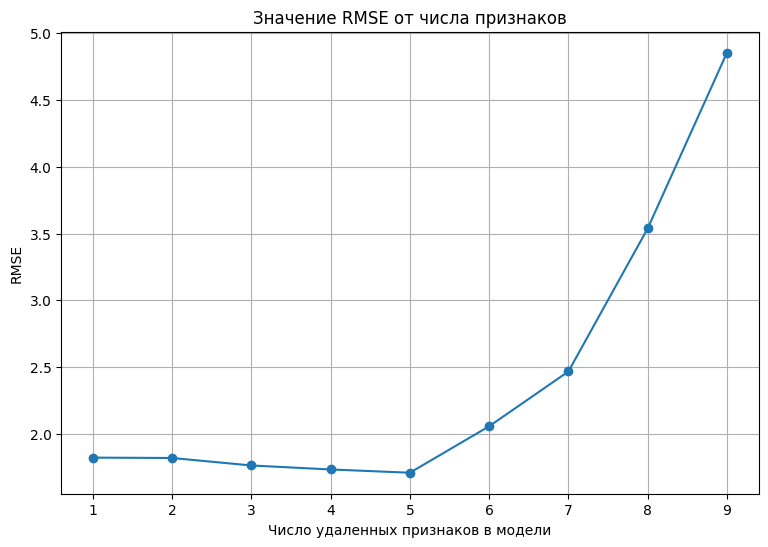

In [29]:
plt.subplots(figsize = (9,6))
plt.plot(scores_rec_df.index, scores_rec_df['RMSE'], marker="o")
plt.title("Значение RMSE от числа признаков")
plt.xlabel("Число удаленных признаков в модели")
plt.ylabel("RMSE")
plt.grid()

Получили, что удаление признаков 7, 8, 6, 5, 9 дает прирост точности модели. Найдем сам прирост для каждого признака

In [30]:
scores_rec_df["Прирост точности"] = rf_rmse_all_selected- scores_rec_df["RMSE"] 

In [31]:
scores_rec_df

,RMSE,Удаленный признак,Прирост точности
1,1.821837,8,0.033891
2,1.819094,7,0.036634
3,1.763028,5,0.092699
4,1.733130,6,0.122597
5,1.708761,9,0.146966
6,2.056900,2,-0.201173
7,2.467050,4,-0.611323
8,3.538561,1,-1.682833
9,4.854656,0,-2.998929


Согласно рекурсивному удалению признаков наименее важные признаки: 7, 8, 6, 5, 9. В гипотезе 2 эти признаки перечислены, кроме 8 признака, в гипотезе 1 фигурирует признак 2, но при этом он не дает положительный прирост точности. Также в гипотезе 1 нет признака 9, хотя он так же дает положительный прирост точности.

## Выводы

In [32]:
scores_rec_df

,RMSE,Удаленный признак,Прирост точности
1,1.821837,8,0.033891
2,1.819094,7,0.036634
3,1.763028,5,0.092699
4,1.733130,6,0.122597
5,1.708761,9,0.146966
6,2.056900,2,-0.201173
7,2.467050,4,-0.611323
8,3.538561,1,-1.682833
9,4.854656,0,-2.998929


In [33]:
scores_independent_delete_df

,RMSE,Прирост точности
5,1.810729,0.044999
9,1.830333,0.025395
8,1.836649,0.019078
6,1.847722,0.008005
7,1.861395,-0.005667
2,2.101931,-0.246204
4,2.154035,-0.298307
1,2.758237,-0.902510
3,3.143137,-1.287410
0,3.221529,-1.365802


Согласно двум способам удаления признаков можно выделить следующие признаки, удаление которых в обоих случаях дает положительный прирост точности: 6, 5, 9, 8. При этом лучше всего удалять признаки рекурсивно, т.к. это дает больший прирост точности $\min_{ind} RMSE = 1.81 > min_{rec} RMSE = 1.69$.